In [2]:
import numpy as np
import pandas as pd

#描画系
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#複数ページをPDF保存する際に必要なmodule
from matplotlib.backends.backend_pdf import PdfPages

#計算系のもの
import re
import math

import pyBigWig

In [3]:
bw_E = pyBigWig.open("../coverage/pol_E_merge.bw")
bw_N = pyBigWig.open("../coverage/pol_N_merge.bw")

In [4]:
polII_peak = pd.read_csv("../peakcall/pol_E_merge_peaks.narrowPeak",
                         sep="\t",
                         header=None)

polII_peak = polII_peak.rename(columns={0:"chr",
                                        1:"start",
                                        2:"end",
                                        3:"name",
                                        4:"score",
                                        5:"strand",
                                        6:"fold_enrichment",
                                        7:"-log10pvalue",
                                        8:"-log10qvalue",
                                        9:"summit_pos"})

In [5]:
polII_peak.head()

,chr,start,end,name,score,strand,fold_enrichment,-log10pvalue,-log10qvalue,summit_pos
0,chr2L,17938,19878,pol_E_merge_peak_1,194,.,3.60714,21.48493,19.40864,588
1,chr2L,20141,20281,pol_E_merge_peak_2,31,.,2.07469,4.57234,3.14717,103
2,chr2L,20448,21407,pol_E_merge_peak_3,278,.,5.80273,34.39745,27.85082,851
3,chr2L,21662,22221,pol_E_merge_peak_4,195,.,4.54308,21.68960,19.58820,134
4,chr2L,66531,67588,pol_E_merge_peak_5,278,.,5.58882,32.02660,27.85082,566


In [6]:
E_peak_array=[]
N_peak_array=[]

for row in polII_peak.itertuples():
    temp_array_E=bw_E.values(row.chr,row.start,row.end)
    temp_array_N=bw_N.values(row.chr,row.start,row.end)
    E_peak_array.append(max(temp_array_E))
    N_peak_array.append(max(temp_array_N))

In [7]:
polII_peak["summit_value_E"]=E_peak_array
polII_peak["summit_value_N"]=N_peak_array

In [8]:
polII_peak.head(15)

,chr,start,end,name,score,strand,fold_enrichment,-log10pvalue,-log10qvalue,summit_pos,summit_value_E,summit_value_N
0,chr2L,17938,19878,pol_E_merge_peak_1,194,.,3.60714,21.48493,19.40864,588,32.838902,36.361099
1,chr2L,20141,20281,pol_E_merge_peak_2,31,.,2.07469,4.57234,3.14717,103,2.896910,3.137760
2,chr2L,20448,21407,pol_E_merge_peak_3,278,.,5.80273,34.39745,27.85082,851,16.552799,17.999399
3,chr2L,21662,22221,pol_E_merge_peak_4,195,.,4.54308,21.68960,19.58820,134,7.444060,8.237470
4,chr2L,66531,67588,pol_E_merge_peak_5,278,.,5.58882,32.02660,27.85082,566,14.268400,16.891899
5,chr2L,71579,74248,pol_E_merge_peak_6,256,.,5.20856,28.19220,25.69582,1071,10.787800,11.450400
6,chr2L,86832,88068,pol_E_merge_peak_7,271,.,4.92016,29.74216,27.11066,518,27.989100,32.956699
7,chr2L,94441,95123,pol_E_merge_peak_8,188,.,4.10725,20.87339,18.82477,349,8.986190,9.761910
8,chr2L,102077,102764,pol_E_merge_peak_9,163,.,4.16281,18.32125,16.36644,379,6.370320,6.931780
9,chr2L,106374,107272,pol_E_merge_peak_10,176,.,4.28165,19.64628,17.63872,304,5.952360,7.075330


<AxesSubplot:xlabel='summit_value_E', ylabel='Count'>

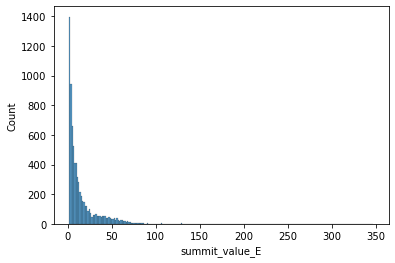

In [9]:
sns.histplot(polII_peak["summit_value_E"])

In [10]:
polII_peak["summit_value_E"].shape

(7372,)

In [11]:
polII_peak[(polII_peak["summit_value_E"]>5) & (polII_peak["summit_value_E"]<10)].head()

,chr,start,end,name,score,strand,fold_enrichment,-log10pvalue,-log10qvalue,summit_pos,summit_value_E,summit_value_N
3,chr2L,21662,22221,pol_E_merge_peak_4,195,.,4.54308,21.68960,19.58820,134,7.44406,8.23747
7,chr2L,94441,95123,pol_E_merge_peak_8,188,.,4.10725,20.87339,18.82477,349,8.98619,9.76191
8,chr2L,102077,102764,pol_E_merge_peak_9,163,.,4.16281,18.32125,16.36644,379,6.37032,6.93178
9,chr2L,106374,107272,pol_E_merge_peak_10,176,.,4.28165,19.64628,17.63872,304,5.95236,7.07533
13,chr2L,143191,143642,pol_E_merge_peak_14,158,.,3.77018,17.74727,15.81485,155,6.71622,6.81556


合計 7372
5<  4598
10<  2891
15<  2002
20<  1525
20<  1193
20<  981

5以下を弾くといい感じにpeakが抽出出来そう。

In [12]:
polII_peak_extract = polII_peak[polII_peak["summit_value_E"]>5]

In [45]:
polII_peak_extract["fold_change"] = polII_peak_extract["summit_value_N"]/polII_peak_extract["summit_value_E"]
polII_peak_extract["summit_value_E_log2"] = polII_peak_extract["summit_value_E"].apply(lambda x:math.log2(x))
polII_peak_extract["summit_value_N_log2"] = polII_peak_extract["summit_value_N"].apply(lambda x:math.log2(x))
polII_peak_extract["significant"] = 1
polII_peak_extract.loc[polII_peak_extract["fold_change_log2"]<-0.1,"significant"] = 10

polII_peak_extract[polII_peak_extract["significant"]==10].shape


<ipython-input-45-065d2cdcaa76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polII_peak_extract["fold_change"] = polII_peak_extract["summit_value_N"]/polII_peak_extract["summit_value_E"]
<ipython-input-45-065d2cdcaa76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polII_peak_extract["summit_value_E_log2"] = polII_peak_extract["summit_value_E"].apply(lambda x:math.log2(x))
<ipython-input-45-065d2cdcaa76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

(48, 17)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


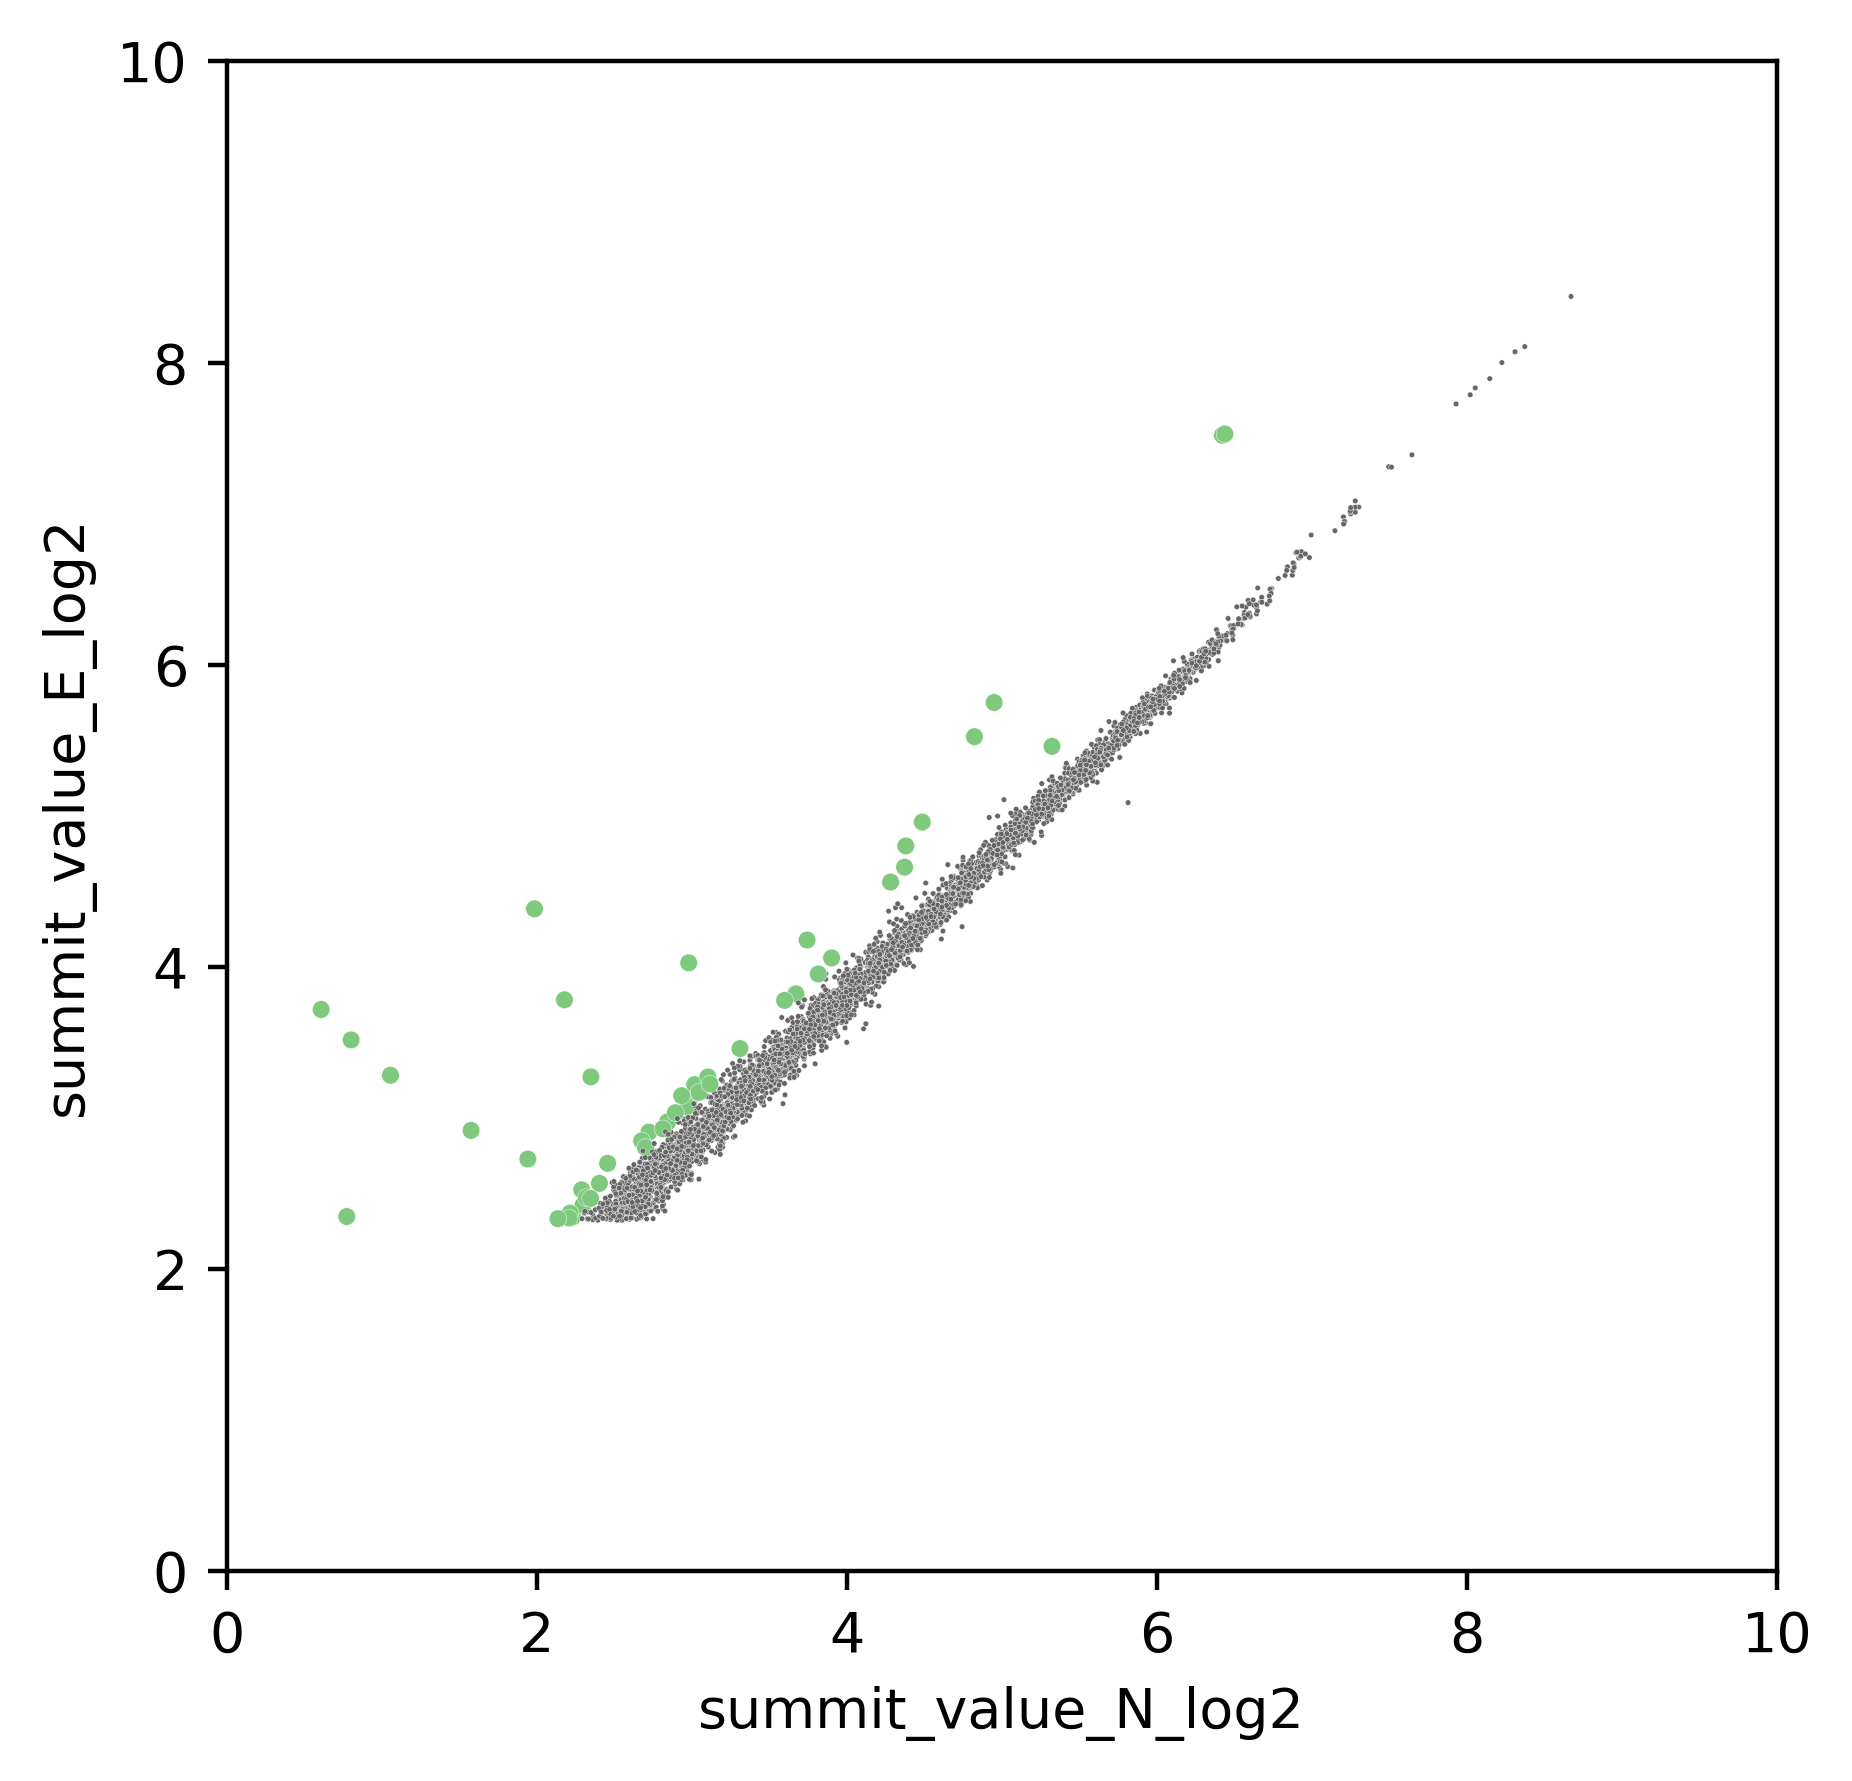

In [59]:
fig = plt.figure(figsize=(5, 5),dpi=400)
plt.xlim(0,10)
plt.ylim(0,10)
sns.scatterplot(polII_peak_extract["summit_value_N_log2"],polII_peak_extract["summit_value_E_log2"],
                s=polII_peak_extract["significant"], 
                c=polII_peak_extract["significant"],
               cmap="Accent_r")
fig.savefig("../pic/scatter_polII.pdf",transparent=True)

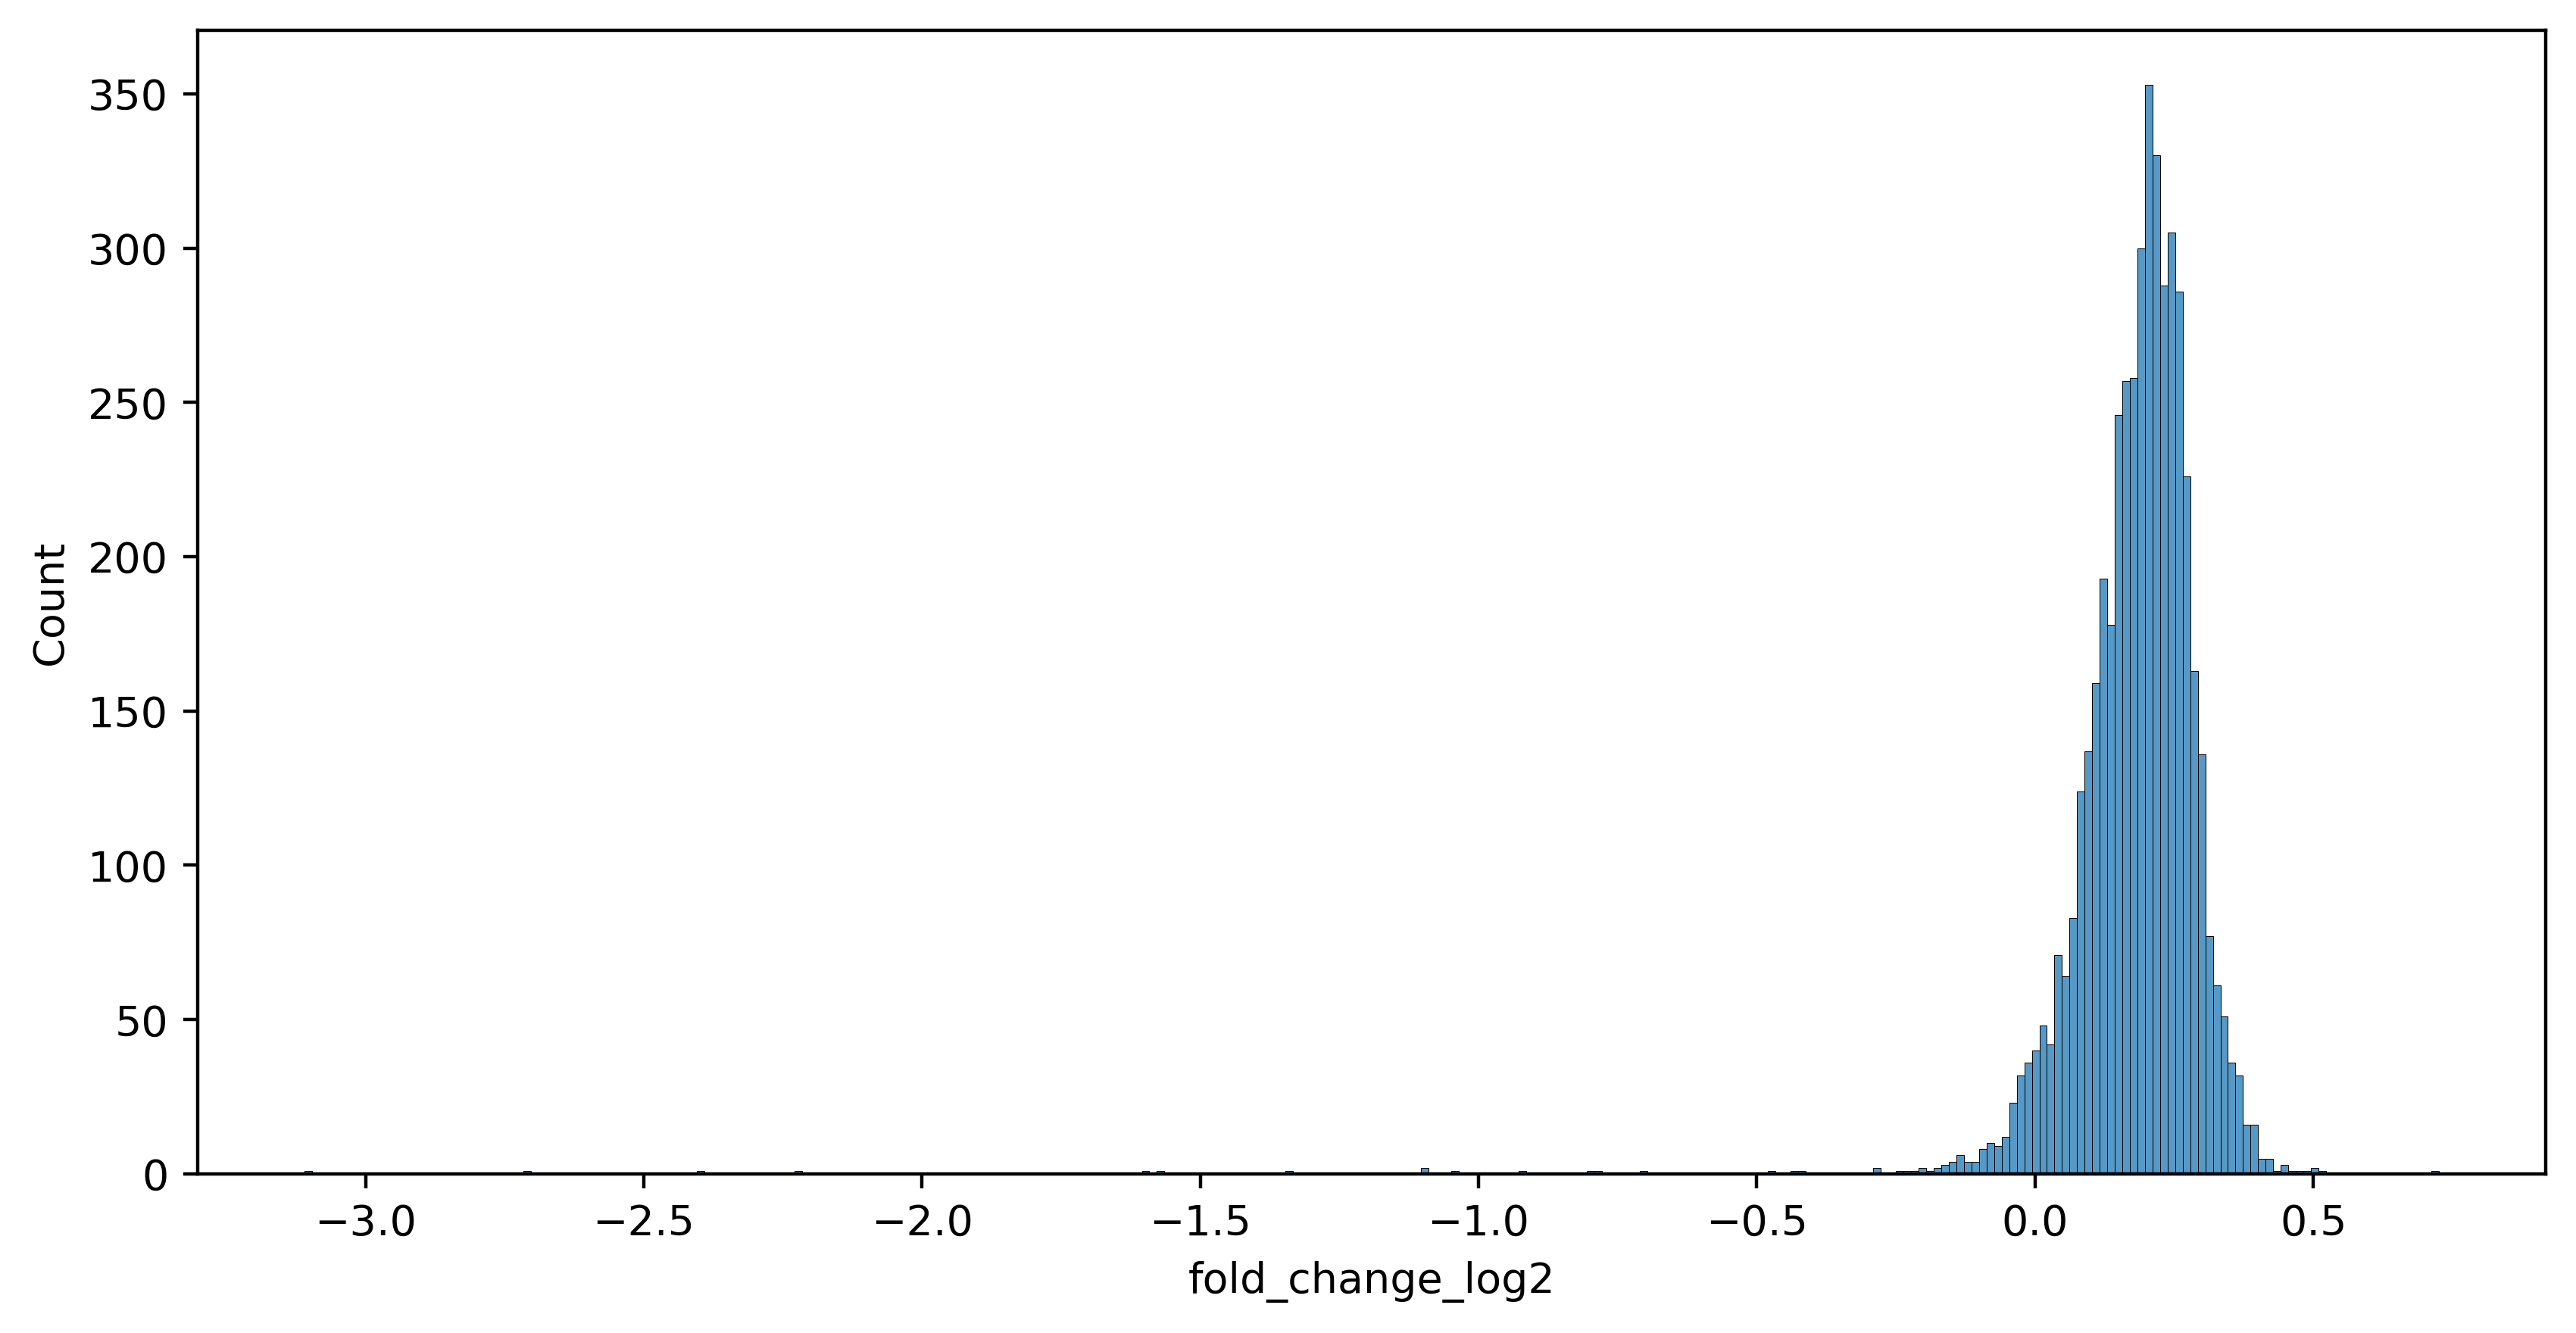

In [13]:
fig = plt.figure(figsize=(10, 5),dpi=400)
sns.histplot(polII_peak_extract["fold_change_log2"])
fig.savefig("../pic/hist_total.pdf",transparent=True)

In [14]:
polII_peak_extract["fold_change_log2"].describe()

count    4775.000000
mean        0.181842
std         0.137694
min        -3.109655
25%         0.134123
50%         0.197995
75%         0.248480
max         0.726200
Name: fold_change_log2, dtype: float64

In [15]:
ex_data =  polII_peak_extract[polII_peak_extract["fold_change_log2"]<-0.1]

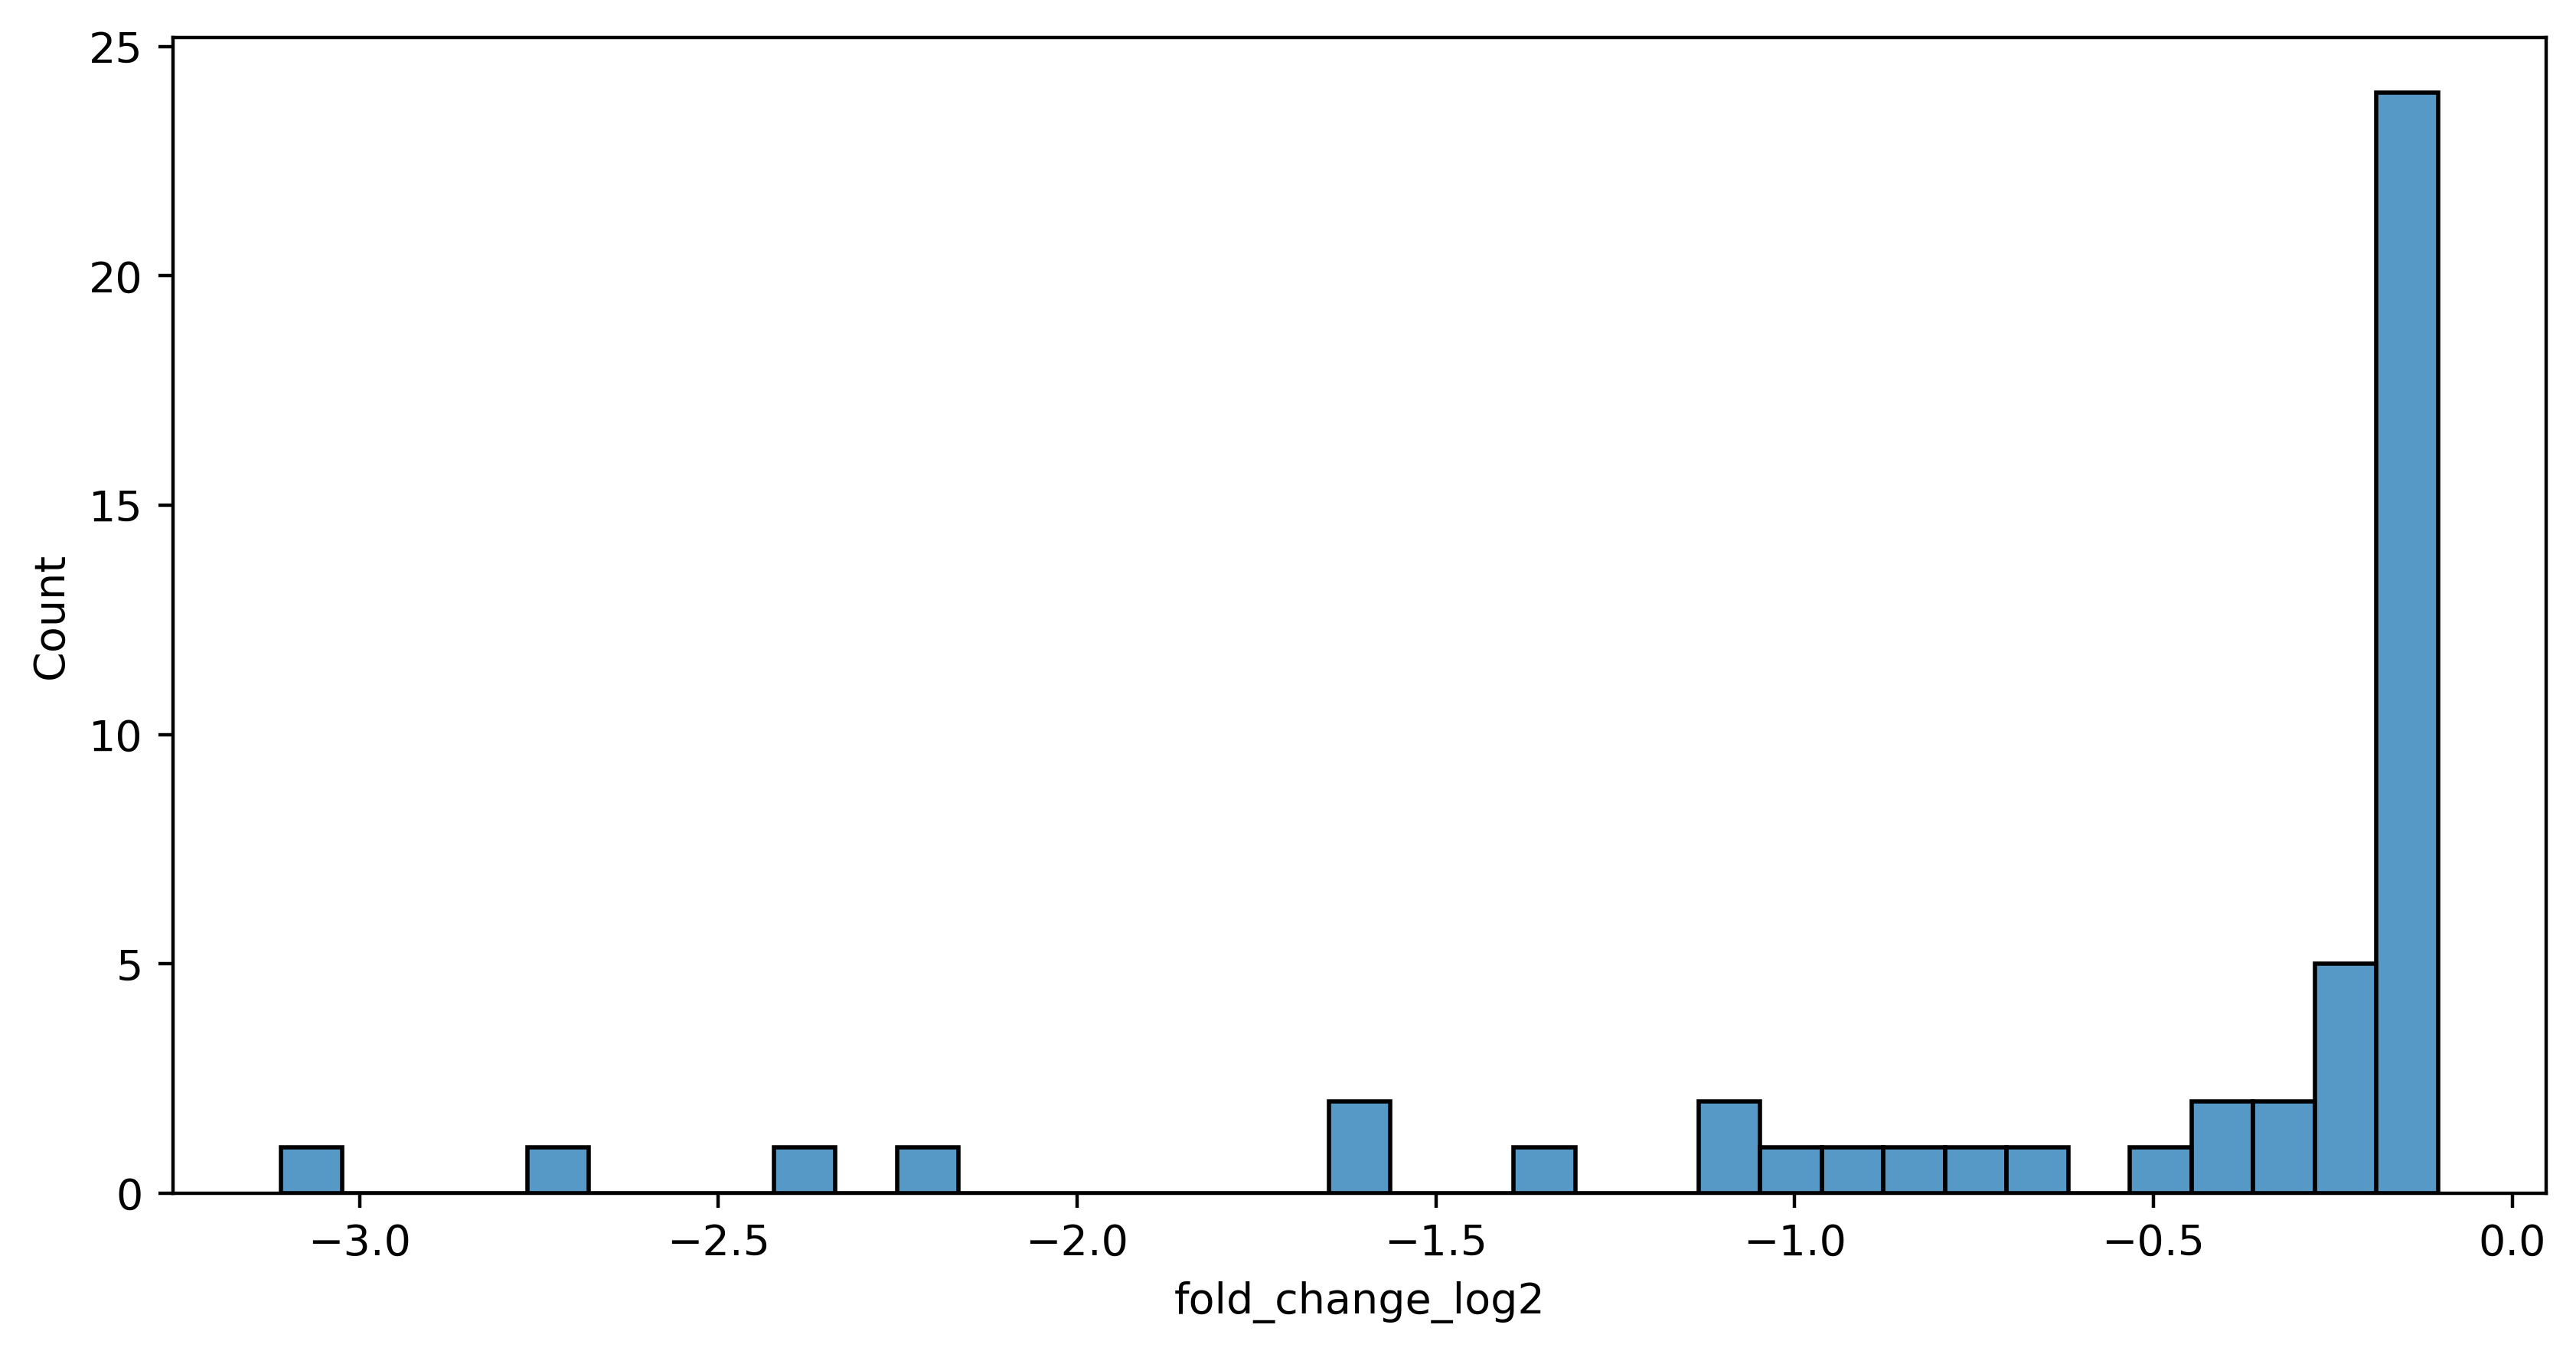

In [16]:
fig = plt.figure(figsize=(10, 5),dpi=400)
sns.histplot(ex_data["fold_change_log2"],bins=35)
fig.savefig("../pic/hist_ex.pdf",transparent=True)

In [17]:
change = polII_peak_extract[polII_peak_extract["fold_change_log2"]< -0.1]

-0.1を敷居値として使用。

In [18]:
no_change = polII_peak_extract[polII_peak_extract["fold_change_log2"]>= -0.1]

In [19]:
change.shape

(48, 14)

In [20]:
no_change.shape

(4727, 14)

In [21]:
change.to_csv("../pausing/polII_change_notrim.bed",sep="\t",index=False)

In [30]:
change = change.drop(["summit_value_E","summit_value_N","fold_change","fold_change_log2",],axis=1)
change.to_csv("../pausing/polII_change.bed",sep="\t",header=False,index=False)

no_change = no_change.drop(["summit_value_E","summit_value_N","fold_change","fold_change_log2",],axis=1)
no_change.to_csv("../pausing/polII_no_change.bed",sep="\t",header=False,index=False)